In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,precision_recall_fscore_support,confusion_matrix

In [2]:
df = pd.read_csv('../../titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
#Creating a new column named Male and it will give male=True and female=False
df["Male"]=df["Sex"]=="male"
# print(df)


#Features defining

x = df.drop(columns=["Survived","Sex"],axis=1).values
#Target defining
y = df["Survived"].values

#split the datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

#using decissiontreeclassifier model
model = DT()
model.fit(x_train,y_train)
# print(model)
y_predic = model.predict(x_test)


print("Without k-fold the metrices are below")
print("Accouracy Score is ",accuracy_score(y_test,y_predic))
print("Precision Score is ",precision_score(y_test,y_predic))
print("Recall Score is ",recall_score(y_test,y_predic))
print("F1 Score is ",f1_score(y_test,y_predic))



Without k-fold the metrices are below
Accouracy Score is  0.7471910112359551
Precision Score is  0.6774193548387096
Recall Score is  0.6268656716417911
F1 Score is  0.6511627906976745


In [4]:
kf = KFold(n_splits=5,shuffle=True)

for criterion in ['gini','entropy']:
#     print("Decision Tress - {} ".format(criterion))
    accuracy=[]
    recall=[]
    precision=[]
    
    for train_index,test_index in kf.split(x):
        x_train,x_test = x[train_index],x[test_index]
        y_train,y_test = y[train_index],y[test_index]
        dt = DT(criterion = criterion)
        dt.fit(x_train,y_train)
        y_pred = dt.predict(x_test)
        accuracy.append(accuracy_score(y_test,y_pred))
        precision.append(precision_score(y_test,y_pred))
        recall.append(recall_score(y_test,y_pred))
print("After k-fold the metrices are below")
print("Accouracy Score is ",np.mean(accuracy))
print("Precision Score is ",np.mean(precision))
print("Recall Score is ",np.mean(recall))
        

After k-fold the metrices are below
Accouracy Score is  0.753075604646734
Precision Score is  0.6799381947264967
Recall Score is  0.694475309950945


In [5]:
#visualizing decission tree
features = ['Pclass','Male','Age','Siblings/Spouses','Parents/Children','Fare']
from sklearn.tree import export_graphviz as export
#graph objects are stored in dot file
dot_file = export(model,feature_names=features)

# import graphviz as visual
# graph = visual.Source(dot_file)
# file = 'dt_titanic'
# graph.render(file,format='png',cleanup=True)

In [6]:
dt = DT(max_depth=6,min_samples_leaf=10,max_leaf_nodes=20)
dt.fit(x_train,y_train)
print("After pruning our tree the metrices are")
print("Accuracy Score is ",accuracy_score(y_test,y_pred))
print("Recall Score is ",recall_score(y_test,y_pred))
print("Precision Score is ",precision_score(y_test,y_pred))
print("F1 Score is ",f1_score(y_test,y_pred))
# def draw(model,features,name):
#     dot_file = export(model,feature_names=features)
#     graph = visual.Source(dot_file)
#     graph.render(name,format='png',cleanup=True)
#     return 0
# draw(dt,features,'dt_titanic_prepruned')

After pruning our tree the metrices are
Accuracy Score is  0.7231638418079096
Recall Score is  0.5616438356164384
Precision Score is  0.7068965517241379
F1 Score is  0.6259541984732825


In [7]:
#grid search
from sklearn.model_selection import GridSearchCV as grd

param_grid = {
    'max_leaf_nodes':[15,20,25,30],
    'max_depth':[5,8,10,12],
    'min_samples_leaf':[5,10,15]
    
}
gs = grd(dt,param_grid,scoring='accuracy',cv=5)

gs.fit(x,y)
print("Best params:", gs.best_params_)
print("Best Score is ", gs.best_score_)



Best params: {'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_leaf': 5}
Best Score is  0.8309464863835458


In [8]:
#comparison between logistic Regression and DT

kf = KFold(n_splits=5,shuffle=True)
dt_accuracy_scores=[]
dt_precision_scores=[]
dt_recall_scores=[]
lr_accuracy_scores=[]
lr_precision_scores=[]
lr_recall_scores=[]
for train_index,test_index in kf.split(x):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]
    model1 = DT()
    model2 = LogisticRegression()
    model1.fit(x_train,y_train)
    model2.fit(x_train,y_train)
    y_prediction = model1.predict(x_test)
    y_predlr = model2.predict(x_test)
    dt_accuracy_scores.append(accuracy_score(y_test,y_prediction))
    dt_precision_scores.append(precision_score(y_test,y_prediction))
    dt_recall_scores.append(recall_score(y_test,y_prediction))
    lr_accuracy_scores.append(accuracy_score(y_test,y_predlr))
    lr_precision_scores.append(precision_score(y_test,y_predlr))
    lr_recall_scores.append(recall_score(y_test,y_predlr))
print("Metrices of Logistic Regression Model")
print("Accuracy Score is ",np.mean(lr_accuracy_scores))
print("Precision Score is ",np.mean(lr_precision_scores))
print("Recall Score is ",np.mean(lr_recall_scores))
print("Metrices of DT ")
print("Accuracy Score is ",np.mean(dt_accuracy_scores))
print("Precision Score is ",np.mean(dt_precision_scores))
print("Recall Score is ",np.mean(dt_recall_scores))



Metrices of Logistic Regression Model
Accuracy Score is  0.8016568272709961
Precision Score is  0.7653643099468527
Recall Score is  0.6987060041407868
Metrices of DT 
Accuracy Score is  0.7666984066527011
Precision Score is  0.6973813926249373
Recall Score is  0.7051759834368531


In [9]:
#determine sebsitivity thats the recall and sprcificity r[0] of lgr 
sensitivityLgr = np.mean(lr_recall_scores)
def specificityLgr(y_test,y_predlr):
    p,r,f,s = precision_recall_fscore_support(y_test,y_predlr)
    return r[0]
specificityLgr = specificityLgr(y_test,y_pred)


#determine sebsitivity thats the recall and sprcificity r[0] of DT

sensitivityDt = np.mean(dt_recall_scores)
def specificityDt(y_test,y_prediction):
    p,r,f,s = precision_recall_fscore_support(y_test,y_prediction)
    return r[0]
specificityDt = specificityDt(y_test,y_prediction)


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

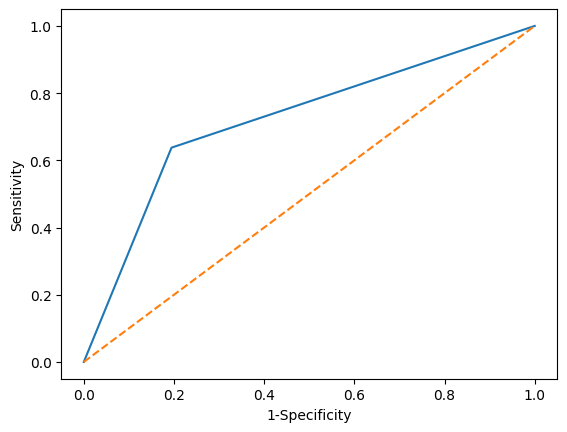

In [11]:
#Roc curve for Decision tree
fpr,tpr,thresholds = roc(y_test,y_prediction)
plt.ylabel("Sensitivity")
plt.xlabel("1-Specificity")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()

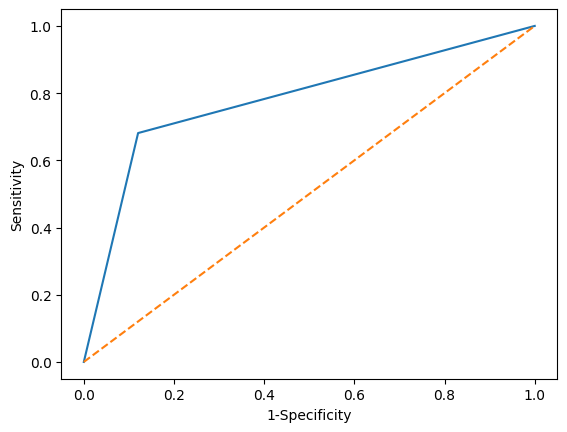

In [12]:
#roc curve for logistic regression
fprlr,tprlr,thresholds = roc(y_test,y_predlr)
plt.ylabel("Sensitivity")
plt.xlabel("1-Specificity")
plt.plot(fprlr,tprlr)
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()